In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Get the data
qqq = yf.download(tickers="QQQ", period="24h", interval="1m")
btc = yf.download(tickers="BTC-USD", period="24h", interval="1m")

# Print the data
print(qqq.tail())
print(btc.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2022-04-28 15:56:00-04:00  327.070007  327.320007  326.720001  327.279999   
2022-04-28 15:57:00-04:00  327.274994  327.450012  327.190002  327.385010   
2022-04-28 15:58:00-04:00  327.375000  327.549988  327.290009  327.420105   
2022-04-28 15:59:00-04:00  327.410004  328.079987  327.309998  327.929993   
2022-04-28 16:00:00-04:00  328.010010  328.010010  328.010010  328.010010   

                            Adj Close   Volume  
Datetime                                        
2022-04-28 15:56:00-04:00  327.279999   318015  
2022-04-28 15:57:00-04:00  327.385010   368311  
2022-04-28 15:58:00-04:00  327.420105   658858  
2022-04-28 15:59:00-04:00  327.929993  1971290  
2022-04-28 16:00:00-04:00  3

In [3]:
df = qqq.merge(btc,how="inner", left_on="Datetime", right_on="Datetime", suffixes=["_qqq","_btc"])
print(df.tail())

                             Open_qqq    High_qqq     Low_qqq   Close_qqq  \
Datetime                                                                    
2022-04-28 15:55:00-04:00  327.619995  327.619995  326.980011  327.049988   
2022-04-28 15:56:00-04:00  327.070007  327.320007  326.720001  327.279999   
2022-04-28 15:57:00-04:00  327.274994  327.450012  327.190002  327.385010   
2022-04-28 15:59:00-04:00  327.410004  328.079987  327.309998  327.929993   
2022-04-28 16:00:00-04:00  328.010010  328.010010  328.010010  328.010010   

                           Adj Close_qqq  Volume_qqq      Open_btc  \
Datetime                                                             
2022-04-28 15:55:00-04:00     327.049988      461269  39955.113281   
2022-04-28 15:56:00-04:00     327.279999      318015  39954.035156   
2022-04-28 15:57:00-04:00     327.385010      368311  39952.386719   
2022-04-28 15:59:00-04:00     327.929993     1971290  39945.390625   
2022-04-28 16:00:00-04:00     328.010010

In [4]:
y1 = df['Close_qqq']
y2 = df['Close_btc']
y1 = (y1 - np.mean(y1)) / np.std(y1)
y2 = (y2 - np.mean(y2)) / np.std(y2)

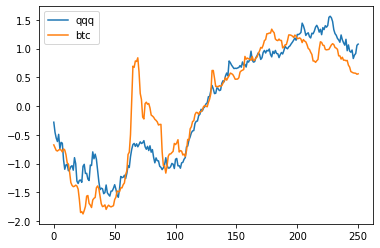

In [5]:
plt.plot(range(len(y1)),y1, label="qqq")
plt.plot(range(len(y2)),y2, label="btc")
plt.legend()

In [6]:
def max_offset(df1, df2):
#     print(len(df1), len(df2))
    corrs = signal.correlate(df1, df2, mode='full')
    return np.argmax(corrs) - len(df1) + 1, corrs[np.argmax(corrs)]
print(max_offset(y1,y2))

(0, 231.30716844502484)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


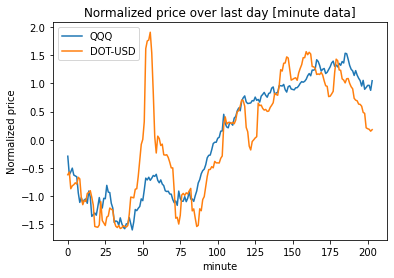

(0, 172.25524790909398)


In [7]:
def ticker_offset(str1, str2, silent=False):
    a = yf.download(tickers=str1, period="24h", interval="1m")
    b = yf.download(tickers=str2, period="24h", interval="1m")
    df = a.merge(b,how="inner", left_on="Datetime", right_on="Datetime", suffixes=["_a","_b"])
    y1 = df['Close_a']
    y2 = df['Close_b']
    y1 = (y1 - np.mean(y1)) / np.std(y1)
    y2 = (y2 - np.mean(y2)) / np.std(y2)
    if not silent:
        plt.plot(range(len(y1)),y1, label=str1)
        plt.plot(range(len(y2)),y2, label=str2)
        plt.legend()
        plt.title("Normalized price over last day [minute data]")
        plt.ylabel("Normalized price")
        plt.xlabel("minute")
        plt.show()
    return max_offset(y1,y2)
print(ticker_offset("QQQ","DOT-USD"))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


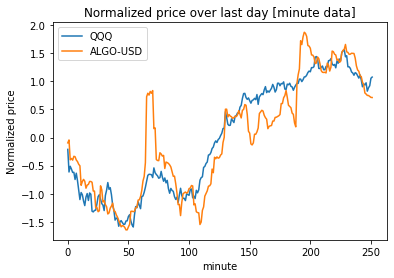

(-1, 230.74845534212642)


In [8]:
print(ticker_offset("QQQ","ALGO-USD"))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

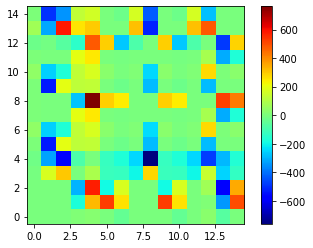

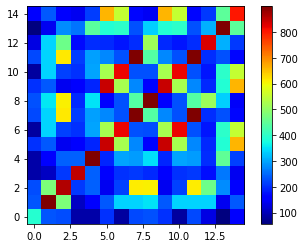

In [9]:
tokens = ["QQQ", "BTC-USD", "ETH-USD", "USDT-USD", "USDC-USD", "XRP-USD", "LUNA1-USD", "ADA-USD", "ALGO-USD", "XRP-USD", "LUNA1-USD", "ADA-USD", "HEX-USD", "AVAX-USD", "DOGE-USD"] # 
offset_matrix = [[None] * len(tokens) for _ in range(len(tokens))] 
max_corr_matrix = [[None] * len(tokens) for _ in range(len(tokens))] 

for idx1, token1 in enumerate(tokens):
    for idx2, token2 in enumerate(tokens):
        offset, max_corr = ticker_offset(token1, token2, silent=True)
        offset_matrix[idx1][idx2] = offset
        max_corr_matrix[idx1][idx2] = max_corr
        
plt.imshow(offset_matrix, interpolation='none', cmap=plt.cm.jet, origin='lower')  
plt.colorbar()
plt.show()

plt.imshow(max_corr_matrix, interpolation='none', cmap=plt.cm.jet, origin='lower')  
plt.colorbar()
plt.show()

In [ ]:
## 